In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [33]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Loading data


In [3]:
df=pd.read_csv('IMDB-Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## value count 

In [4]:
label_counts=df['sentiment'].value_counts()

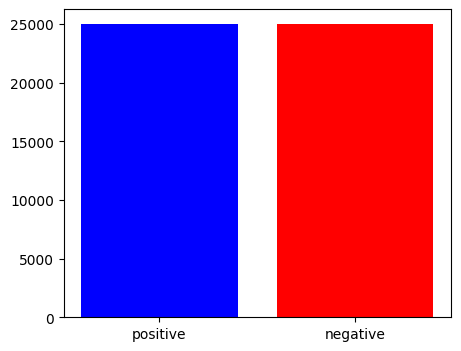

In [5]:
plt.figure(figsize=(5,4))
plt.bar(label_counts.index,label_counts.values,color=['blue','red'])
plt.show()

not imballanced data

## missing values

In [6]:
missing_values=df.isnull().sum()
missing_values

review       0
sentiment    0
dtype: int64

In [7]:
blanks=[]
for i,comment,label in df.itertuples():
    if comment.isspace():
        blank.append(i)

print(len(blanks))

0


## cleaning data

In [8]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [58]:
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
sw=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [61]:
def preprocess_text(messy_string):
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])
    return cleaned 

In [62]:
test='hello my name is vala and im happy to be here'
preprocess_text(test)

'hello name vala im happy'

In [63]:
df['review'].apply(preprocess_text)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [64]:
print(df.head(5))

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [65]:
df['review']=df['review'].str.lower()

In [66]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [67]:
import re 
import string 
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text) # Remove all HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation (., "' etc.) 
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces 
    return text
    
df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


## split data 

In [68]:
X=df['review']
y=df['sentiment']

In [69]:
from sklearn.model_selection import train_test_split 
X_train, X_temp, y_train,y_temp =train_test_split(X,y,test_size=0.3,random_state=42)
X_val, X_test, y_val,y_test =train_test_split(X_temp,y_temp,test_size=1/3,random_state=42)

In [70]:
print('  train: ', X_train.shape[0],'  validation: ', X_val.shape[0],'  test: ', X_test.shape[0])

  train:  35000   validation:  10000   test:  5000


In [96]:
y_val

31405    negative
40845    positive
6347     positive
24994    negative
7725     positive
           ...   
6420     negative
33928    negative
48421    positive
26037    positive
31247    negative
Name: sentiment, Length: 10000, dtype: object

# TF-IDF

## Training model 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv=CountVectorizer()
tfidf= TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)
X_val_tfidf=tfidf.transform(X_val)


In [24]:
X_train_tfidf

<35000x135688 sparse matrix of type '<class 'numpy.float64'>'
	with 4756417 stored elements in Compressed Sparse Row format>

In [25]:
X_val_tfidf.shape

(10000, 135688)

## logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [97]:
y_val

31405    negative
40845    positive
6347     positive
24994    negative
7725     positive
           ...   
6420     negative
33928    negative
48421    positive
26037    positive
31247    negative
Name: sentiment, Length: 10000, dtype: object

In [27]:
from sklearn.metrics import classification_report,confusion_matrix 
y_pred=clf.predict(X_val_tfidf)
report=classification_report(y_val,y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4918
    positive       0.90      0.91      0.90      5082

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



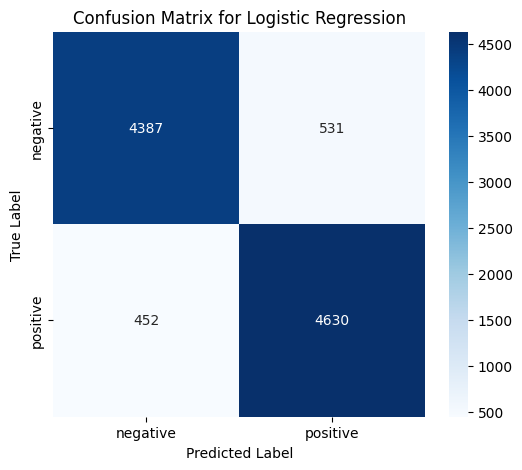

In [29]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


# count vectorize

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#cv=CountVectorizer()
#tfidf= TfidfVectorizer()
#X=cv.fit_transform(df['review'])
#y=df['sentiment']

In [26]:
#from sklearn.model_selection import train_test_split 
#X_train, X_temp, y_train,y_temp =train_test_split(X,y,test_size=0.3,random_state=42)
#X_val, X_test, y_val,y_test =train_test_split(X_temp,y_temp,test_size=1/3,random_state=42)

In [27]:
#from sklearn.linear_model import LogisticRegression 
#clf=LogisticRegression(max_iter=1000)
#clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
#from sklearn.metrics import classification_report,confusion_matrix 
#y_pred=clf.predict(X_val)
#report=classification_report(y_val,y_pred)
#print(report)

              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4918
    positive       0.89      0.90      0.90      5082

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_val, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## SVM 

Training SVM...
[LibSVM]Classification Report for SVM:
               precision    recall  f1-score   support

    negative       0.91      0.90      0.90      4918
    positive       0.90      0.92      0.91      5082

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



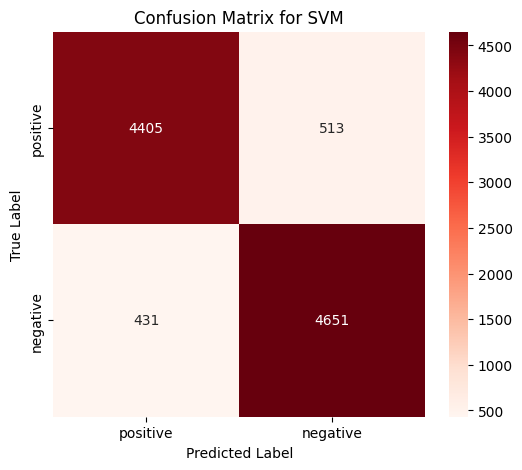

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC



# Train and evaluate SVM

svm_model = SVC(kernel='rbf', cache_size=700, verbose=True)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)
report_svm = classification_report(y_val, y_pred_svm)
print("Classification Report for SVM:\n", report_svm)

cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")




## KNN 

Classification Report for KNN:
               precision    recall  f1-score   support

    negative       0.79      0.69      0.74      4918
    positive       0.73      0.82      0.77      5082

    accuracy                           0.76     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.76      0.75     10000



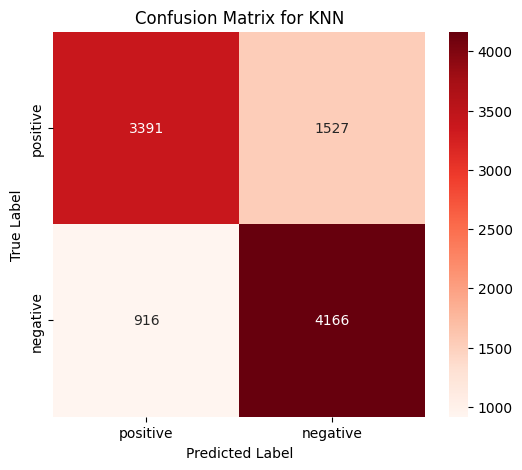

Progress: 100% completed



In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_tfidf, y_train)

y_pred_knn = knn_model.predict(X_val_tfidf)
report_knn = classification_report(y_val, y_pred_knn)
print("Classification Report for KNN:\n", report_knn)

cm_knn = confusion_matrix(y_val, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN")
plt.show()
print("Progress: 100% completed\n")


In [42]:
y_train

38094   NaN
40624   NaN
49425   NaN
35734   NaN
41708   NaN
         ..
11284   NaN
44732   NaN
38158   NaN
860     NaN
15795   NaN
Name: sentiment, Length: 35000, dtype: float64

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single text
y_cloud= y.map({"positive": 1, "negative": 0})
positive_text = " ".join(X[y_cloud == 1].astype(str))
negative_text = " ".join(X[y_cloud == 0].astype(str))
print(f"Length of positive_text: {len(positive_text)}")
print(f"Length of negative_text: {len(negative_text)}")



Length of positive_text: 31582723
Length of negative_text: 30745407


Length of positive_text: 31582723
Length of negative_text: 30745407


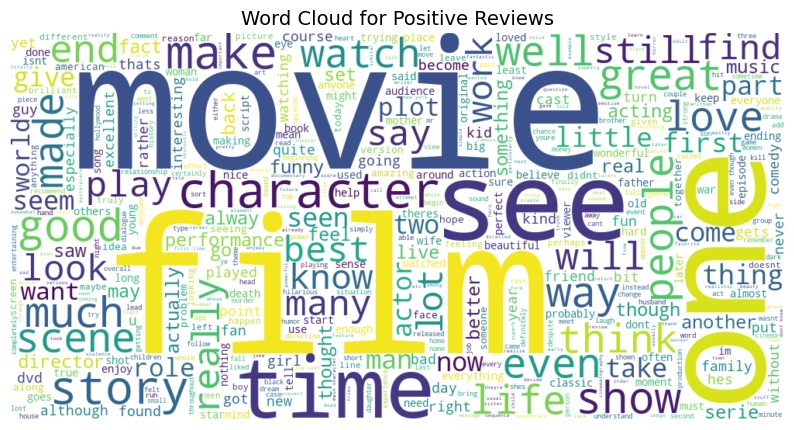

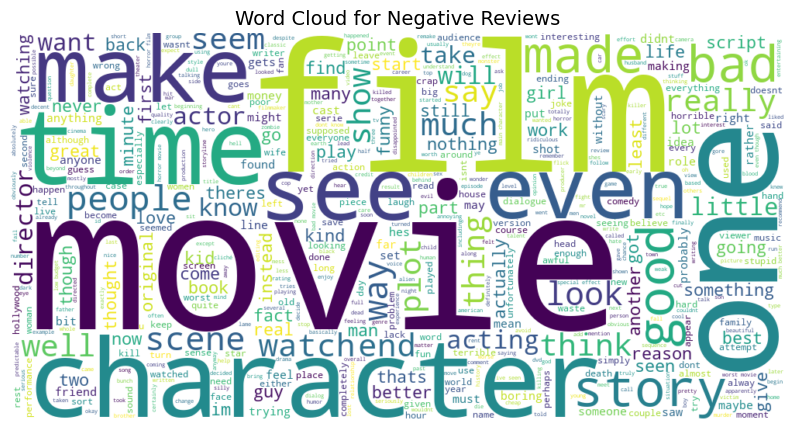

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure y is properly mapped (only needed if y contains "positive"/"negative")
if y.dtype == 'object':  
    y = y.map({"positive": 1, "negative": 0})

# Combine all positive and negative reviews into single texts
positive_text = " ".join(X[y == 1].astype(str))
negative_text = " ".join(X[y == 0].astype(str))

print(f"Length of positive_text: {len(positive_text)}")
print(f"Length of negative_text: {len(negative_text)}")

# Check if text is not empty before generating word clouds
if len(positive_text) > 0:
    plt.figure(figsize=(10, 6))
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, background_color="white")
    positive_words = WC.generate(positive_text)

    # Display
    plt.imshow(positive_words, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Positive Reviews", fontsize=14)
    plt.show()
else:
    print("No positive reviews found!")

if len(negative_text) > 0:
    plt.figure(figsize=(10, 6))
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, background_color="white")
    negative_words = WC.generate(negative_text)

    # Display
    plt.imshow(negative_words, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Negative Reviews", fontsize=14)
    plt.show()
else:
    print("No negative reviews found!")


# Final Results On test dataset 

## Logistic Regression

In [93]:
y_test = y_test.map({"positive": 1, "negative": 0})

In [95]:
from sklearn.linear_model import LogisticRegression 
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf,y_train)
from sklearn.metrics import classification_report,confusion_matrix 
y_pred=clf.predict(X_test_tfidf)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2493
           1       0.89      0.91      0.90      2507

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In [99]:

from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', cache_size=700, verbose=True)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", report_svm)

[LibSVM]Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2493
           1       0.90      0.92      0.91      2507

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_tfidf, y_train)

y_pred_knn = knn_model.predict(X_test_tfidf)
report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN:\n", report_knn)

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      2493
           1       0.74      0.83      0.79      2507

    accuracy                           0.77      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.77      0.77      5000

